In [25]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels
# !pip install sklearn

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import math

In [29]:
import tensorflow.keras as keras
from keras import layers
from statsmodels.api import OLS
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.layers import Dense, LSTM, GRU

# Load dataset

In [30]:
with open('dataset.pkl', 'rb') as f:
    data = pickle.load(f)

# Generate the dataset of all subsets

In [31]:
def work_with_nan(df):
    df = df.fillna(0)
    
    return df

In [32]:
tXY = pd.DataFrame(columns = data['MutantApeYachtClub'].columns)
tXY['collection'] = None

for i in data.keys():
    tmp = data[i].copy()
    tmp = work_with_nan(tmp)
    tmp['collection'] = i
    
    tXY = pd.concat([tXY, tmp], sort=False)

print('len of the whole dataset:', len(tXY))
tXY.head()

len of the whole dataset: 9122


,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,...,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol,collection
0,2022-05-01,23420.275634,0.000000,20321.779297,1.965430e+08,2.389735e+05,0.0,8392,31476.0,18,...,38469.093750,27002760110,2827.756104,15332730152,89.671509,1426749080,0.000000,0.000000,0.000000,Otherdeed
1,2022-05-02,28144.463557,0.000000,14212.331055,1.109455e+08,2.493893e+06,0.0,3942,33094.0,3,...,38529.328125,32922642426,2857.410400,18609741545,87.581017,1265220129,60.234375,29.654297,-2.090492,Otherdeed
2,2022-05-03,23819.450167,0.000000,12583.413086,3.923063e+07,1.252085e+06,0.0,1647,33520.0,4,...,37750.453125,27326943244,2783.476318,13026093219,85.842377,1011988792,-778.875000,-73.934082,-1.738640,Otherdeed
3,2022-05-04,23066.776050,0.000000,11631.999023,7.888837e+06,7.280967e+08,0.0,342,33825.0,72,...,39698.371094,36754404490,2940.644775,18186749944,92.770851,1428455342,1947.917969,157.168457,6.928474,Otherdeed
4,2022-05-05,37866.046998,9555.102539,12414.667969,5.414845e+06,8.607427e+08,0.0,143,33831.0,1057,...,36575.140625,43106256317,2749.213135,22642925048,84.596024,1805979399,-3123.230469,-191.431641,-8.174828,Otherdeed


In [33]:
with open('all data.pkl', 'wb') as f:
    pickle.dump(tXY, f)

# Feature engineering

In [34]:
tXY.head()

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,...,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol,collection
0,2022-05-01,23420.275634,0.000000,20321.779297,1.965430e+08,2.389735e+05,0.0,8392,31476.0,18,...,38469.093750,27002760110,2827.756104,15332730152,89.671509,1426749080,0.000000,0.000000,0.000000,Otherdeed
1,2022-05-02,28144.463557,0.000000,14212.331055,1.109455e+08,2.493893e+06,0.0,3942,33094.0,3,...,38529.328125,32922642426,2857.410400,18609741545,87.581017,1265220129,60.234375,29.654297,-2.090492,Otherdeed
2,2022-05-03,23819.450167,0.000000,12583.413086,3.923063e+07,1.252085e+06,0.0,1647,33520.0,4,...,37750.453125,27326943244,2783.476318,13026093219,85.842377,1011988792,-778.875000,-73.934082,-1.738640,Otherdeed
3,2022-05-04,23066.776050,0.000000,11631.999023,7.888837e+06,7.280967e+08,0.0,342,33825.0,72,...,39698.371094,36754404490,2940.644775,18186749944,92.770851,1428455342,1947.917969,157.168457,6.928474,Otherdeed
4,2022-05-05,37866.046998,9555.102539,12414.667969,5.414845e+06,8.607427e+08,0.0,143,33831.0,1057,...,36575.140625,43106256317,2749.213135,22642925048,84.596024,1805979399,-3123.230469,-191.431641,-8.174828,Otherdeed


In [35]:
# label encoder
def label_encoder(df):
    label = LabelEncoder()
    df["collection"] = label.fit_transform(df["collection"])
    
    return df

In [36]:
from sklearn import preprocessing
# Normalizing the Data
def normalize(df):
    scaler = preprocessing.MinMaxScaler()
    names = df.columns
    d = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(d, columns=names)
    scaled_df.head()
    
    return scaled_df

In [37]:
tmp = tXY.copy()
tmp = tmp.drop(['prices_floor', 'prices_median', 'dates'], axis=1)
tmp = label_encoder(tmp)
tmp = tmp.astype('float32')

In [38]:
corr = tmp.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,prices_avg,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol,collection
prices_avg,1.00,0.19,0.82,0.62,-0.08,-0.04,-0.07,0.19,0.10,-0.04,0.12,-0.05,0.12,0.06,-0.01,0.00,0.00,-0.13
volume,0.19,1.00,0.15,0.07,0.50,0.12,0.15,0.22,0.07,-0.00,0.08,0.01,0.04,0.04,-0.00,0.02,0.03,-0.09
marketcap,0.82,0.15,1.00,0.55,-0.08,0.08,-0.04,0.18,0.08,-0.06,0.10,-0.06,0.09,0.05,-0.00,0.00,0.00,-0.12
lowwatermark,0.62,0.07,0.55,1.00,-0.05,-0.05,-0.06,0.04,0.00,-0.03,0.00,-0.02,-0.02,0.00,0.01,0.01,0.01,-0.11
amount_transactions,-0.08,0.50,-0.08,-0.05,1.00,0.08,0.65,0.06,-0.03,-0.01,-0.04,0.01,-0.06,-0.03,0.00,0.01,0.01,-0.02
amount_owners,-0.04,0.12,0.08,-0.05,0.08,1.00,0.11,0.03,-0.04,-0.06,0.00,-0.07,0.01,0.01,-0.01,-0.01,-0.01,-0.01
amount_sellers,-0.07,0.15,-0.04,-0.06,0.65,0.11,1.00,0.03,-0.10,-0.03,-0.07,-0.03,-0.05,0.00,-0.00,-0.01,-0.01,0.00
amount_buyers,0.19,0.22,0.18,0.04,0.06,0.03,0.03,1.00,0.08,0.01,0.09,0.04,0.07,0.02,0.00,0.01,0.02,-0.05
btc adj close,0.10,0.07,0.08,0.00,-0.03,-0.04,-0.10,0.08,1.00,0.09,0.92,0.02,0.84,0.30,0.09,0.15,0.16,-0.09
btc volume,-0.04,-0.00,-0.06,-0.03,-0.01,-0.06,-0.03,0.01,0.09,1.00,-0.01,0.85,-0.05,0.31,-0.15,-0.18,-0.15,-0.08


# Models

## Linear Regression 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import r2_score

In [40]:
tmp.head()

,prices_avg,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol,collection
0,23420.275391,196542960.0,2.389735e+05,0.0,8392.0,31476.0,18.0,8.000000,38469.093750,2.700276e+10,2827.756104,1.533273e+10,89.671509,1.426749e+09,0.000000,0.000000,0.000000,55.0
1,28144.462891,110945472.0,2.493893e+06,0.0,3942.0,33094.0,3.0,9.000000,38529.328125,3.292264e+10,2857.410400,1.860974e+10,87.581017,1.265220e+09,60.234375,29.654297,-2.090492,55.0
2,23819.449219,39230636.0,1.252085e+06,0.0,1647.0,33520.0,4.0,2.000000,37750.453125,2.732694e+10,2783.476318,1.302609e+10,85.842377,1.011989e+09,-778.875000,-73.934082,-1.738640,55.0
3,23066.775391,7888837.5,7.280967e+08,0.0,342.0,33825.0,72.0,2.000000,39698.371094,3.675440e+10,2940.644775,1.818675e+10,92.770851,1.428455e+09,1947.917969,157.168457,6.928474,55.0
4,37866.046875,5414844.5,8.607427e+08,0.0,143.0,33831.0,1057.0,4.333333,36575.140625,4.310625e+10,2749.213135,2.264293e+10,84.596024,1.805979e+09,-3123.230469,-191.431641,-8.174828,55.0


In [41]:
tmp_reg = tmp.copy()
tmp_reg = normalize(tmp_reg)

X = tmp_reg.drop(['prices_avg'], axis = 1).copy()
y = tmp_reg['prices_avg'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test) 

y_pred = lm.predict(X_test)
print('R^2:  ', lm.score(X_train, y_train))
print('MAE:  ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:  ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

R^2:   0.7282620297309033
MAE:   0.01567862
MSE:   0.0013232912
RMSE:  0.1252143


## Lasso 

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [43]:
X = tmp_reg.drop(['prices_avg'], axis = 1).copy()
y = tmp_reg['prices_avg'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train, y_train)
get_cv_scores(lasso)

CV Mean:  -0.00017925320492659936
STD:  0.0001859175751724396




In [44]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=3)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Score:  0.7109692176608964
Best Params:  {'alpha': 1e-05}


In [45]:
reg = Lasso(alpha=grid_result.best_params_['alpha'])
reg.fit(X_train, y_train)

print('R^2  ', round(reg.score(X_train, y_train)*100, 2))
print('R^2  ', round(reg.score(X_test, y_test)*100, 2))

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE: ', round(mse_train, 4))

# Test data
pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE: ', round(mse_test, 4))

R^2   71.7
R^2   75.75
MSE:  0.0011
MSE:  0.0011


## LSTM

In [46]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import r2_score

In [47]:
tmp.head()

,prices_avg,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol,collection
0,23420.275391,196542960.0,2.389735e+05,0.0,8392.0,31476.0,18.0,8.000000,38469.093750,2.700276e+10,2827.756104,1.533273e+10,89.671509,1.426749e+09,0.000000,0.000000,0.000000,55.0
1,28144.462891,110945472.0,2.493893e+06,0.0,3942.0,33094.0,3.0,9.000000,38529.328125,3.292264e+10,2857.410400,1.860974e+10,87.581017,1.265220e+09,60.234375,29.654297,-2.090492,55.0
2,23819.449219,39230636.0,1.252085e+06,0.0,1647.0,33520.0,4.0,2.000000,37750.453125,2.732694e+10,2783.476318,1.302609e+10,85.842377,1.011989e+09,-778.875000,-73.934082,-1.738640,55.0
3,23066.775391,7888837.5,7.280967e+08,0.0,342.0,33825.0,72.0,2.000000,39698.371094,3.675440e+10,2940.644775,1.818675e+10,92.770851,1.428455e+09,1947.917969,157.168457,6.928474,55.0
4,37866.046875,5414844.5,8.607427e+08,0.0,143.0,33831.0,1057.0,4.333333,36575.140625,4.310625e+10,2749.213135,2.264293e+10,84.596024,1.805979e+09,-3123.230469,-191.431641,-8.174828,55.0


In [48]:
tmp_lstm = tmp.copy()
tmp_lstm = normalize(tmp_lstm)
X = tmp_lstm.drop(['prices_avg'], axis = 1).copy()
y = tmp_lstm['prices_avg'].copy()

In [49]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 5
X1, y1 = df_to_X_y(y, WINDOW_SIZE)
print(X1.shape, y1.shape)

X_train, y_train = X1[:6500], y1[:6500]
X_val, y_val = X1[6500:7000], y1[6500:7000]
X_test, y_test = X1[7000:], y1[7000:]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(9117, 5, 1) (9117,)
(6500, 5, 1) (6500,) (500, 5, 1) (500,) (2117, 5, 1) (2117,)


In [50]:
model = Sequential([layers.InputLayer(X_train.shape[1:]),
                        layers.LSTM(128, return_sequences=True),
                        layers.Dropout(0.2),
                        layers.LSTM(128, return_sequences=False),
                        layers.Dropout(0.2),
                        layers.Dense(64, kernel_initializer='uniform', activation='relu'),
                        layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_2 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 206,465
Trainable params: 206,465
Non-tr

In [51]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
204/204 [==============================] - 7s 18ms/step - loss: 9.4035e-04 - mean_absolute_error: 0.0144 - val_loss: 4.0253e-05 - val_mean_absolute_error: 0.0044
Epoch 2/10
204/204 [==============================] - 3s 14ms/step - loss: 3.8805e-04 - mean_absolute_error: 0.0097 - val_loss: 2.1774e-05 - val_mean_absolute_error: 0.0040
Epoch 3/10
204/204 [==============================] - 3s 14ms/step - loss: 3.8367e-04 - mean_absolute_error: 0.0094 - val_loss: 3.2413e-05 - val_mean_absolute_error: 0.0037
Epoch 4/10
204/204 [==============================] - 3s 14ms/step - loss: 3.4486e-04 - mean_absolute_error: 0.0092 - val_loss: 6.4232e-05 - val_mean_absolute_error: 0.0052
Epoch 5/10
204/204 [==============================] - 3s 14ms/step - loss: 3.3622e-04 - mean_absolute_error: 0.0089 - val_loss: 1.7090e-05 - val_mean_absolute_error: 0.0033
Epoch 6/10
204/204 [==============================] - 3s 14ms/step - loss: 3.2437e-04 - mean_absolute_error: 0.0085 - val_loss: 1.6832e

R^2 train:  0.9363305183954167
MSE train:  0.00028574368


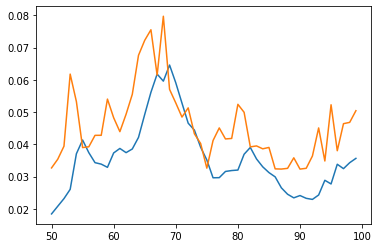

R^2 test:  0.569031071562067
MSE test:  0.0006176776


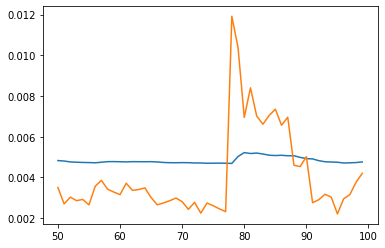

In [52]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
print('R^2 train: ', r2_score(train_results['Train Predictions'], train_results['Actuals']))
print('MSE train: ', mean_squared_error(train_results['Train Predictions'], train_results['Actuals']))
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.show()


train_predictions = model.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
print('R^2 test: ', r2_score(train_results['Train Predictions'], train_results['Actuals']))
print('MSE test: ', mean_squared_error(train_results['Train Predictions'], train_results['Actuals']))
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [53]:
# def define_model(learning_rate=0.001, dropout_rate=0.2, activation='relu', init_weights='uniform'): 
#     model = Sequential([layers.InputLayer(X_train.shape[1:]),
#                         layers.LSTM(128, return_sequences=True),
#                         layers.Dropout(dropout_rate),
#                         layers.LSTM(128, return_sequences=False),
#                         layers.Dropout(dropout_rate),
#                         layers.Dense(64, kernel_initializer=init_weights, activation=activation),
#                         layers.Dense(1)])

#     model.compile(loss='mse', 
#                   optimizer=Adam(learning_rate=learning_rate),
#                   metrics=['mean_absolute_error'])
    
#     return model

# batch_size = 10
# epochs = 10
# model = KerasClassifier(build_fn=define_model, 
#                         epochs=epochs, 
#                         batch_size = batch_size, 
#                         verbose=1)

# # activation = ['softmax', 'relu']
# # init_weights = ['uniform', 'normal', 'linear']
# # dropout_rate = [0.0,  0.2, 0.4]
# # batch_size = [10, 50, 100]
# # epochs = [1, 5, 10]

# activation = ['softmax']
# init_weights = ['uniform', 'normal']
# dropout_rate = [0.0,  0.2]
# batch_size = [10, 50]
# epochs = [10]

# param_grid = dict(activation=activation, 
#                   init_weights=init_weights,
#                   dropout_rate=dropout_rate,
#                   batch_size=batch_size, 
#                   epochs=epochs)

# # x_grid, x_not_use, y_grid, y_not_use = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2, cv=5)

# grid_result = grid.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

## GRU

In [54]:
tmp_gru = tmp.copy()
tmp_gru = normalize(tmp_gru)
X = tmp_gru.drop(['prices_avg'], axis = 1).copy()
y = tmp_gru['prices_avg'].copy()

In [55]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(y, WINDOW_SIZE)
print(X1.shape, y1.shape)

X_train, y_train = X1[:6500], y1[:6500]
X_val, y_val = X1[6500:7000], y1[6500:7000]
X_test, y_test = X1[7000:], y1[7000:]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(9117, 5, 1) (9117,)
(6500, 5, 1) (6500,) (500, 5, 1) (500,) (2117, 5, 1) (2117,)


RMSProp

In [56]:
model = Sequential([layers.InputLayer(X_train.shape[1:]),
                        layers.GRU(128, return_sequences=True),
                        layers.Dropout(0.2),
                        layers.GRU(128, return_sequences=False),
                        layers.Dropout(0.2),
                        layers.Dense(64, kernel_initializer='uniform', activation='relu'),
                        layers.Dense(1)])

model.compile(loss='mse', 
              optimizer="rmsprop",
              metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 128)            50304     
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)            0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 157,697
Trainable params: 157,697
Non-tr

In [57]:

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
204/204 [==============================] - 7s 15ms/step - loss: 7.0019e-04 - mean_absolute_error: 0.0146 - val_loss: 7.3178e-05 - val_mean_absolute_error: 0.0063
Epoch 2/10
204/204 [==============================] - 2s 12ms/step - loss: 4.8917e-04 - mean_absolute_error: 0.0125 - val_loss: 1.0177e-04 - val_mean_absolute_error: 0.0084
Epoch 3/10
204/204 [==============================] - 2s 12ms/step - loss: 4.5090e-04 - mean_absolute_error: 0.0118 - val_loss: 2.3520e-04 - val_mean_absolute_error: 0.0150
Epoch 4/10
204/204 [==============================] - 2s 12ms/step - loss: 4.2625e-04 - mean_absolute_error: 0.0115 - val_loss: 1.3913e-04 - val_mean_absolute_error: 0.0073
Epoch 5/10
204/204 [==============================] - 2s 12ms/step - loss: 3.9813e-04 - mean_absolute_error: 0.0112 - val_loss: 2.1270e-04 - val_mean_absolute_error: 0.0129
Epoch 6/10
204/204 [==============================] - 2s 12ms/step - loss: 4.2315e-04 - mean_absolute_error: 0.0114 - val_loss: 4.6644e

R^2 train:  0.8800646414269495
MSE train:  0.00087880495


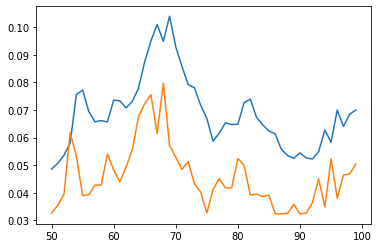

R^2 test:  0.6108160719784645
MSE test:  0.0009189376


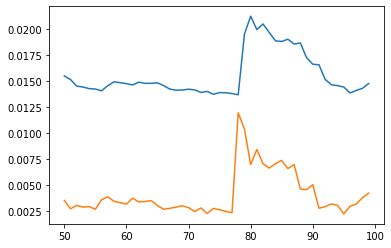

In [58]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
print('R^2 train: ', r2_score(train_results['Train Predictions'], train_results['Actuals']))
print('MSE train: ', mean_squared_error(train_results['Train Predictions'], train_results['Actuals']))
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.show()


train_predictions = model.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
print('R^2 test: ', r2_score(train_results['Train Predictions'], train_results['Actuals']))
print('MSE test: ', mean_squared_error(train_results['Train Predictions'], train_results['Actuals']))
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

ADAM

In [59]:
model.compile(loss='mse', 
              optimizer="adam",
              metrics=['mean_absolute_error'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 128)            50304     
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)            0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 157,697
Trainable params: 157,697
Non-tr

In [60]:

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
204/204 [==============================] - 7s 16ms/step - loss: 3.0541e-04 - mean_absolute_error: 0.0086 - val_loss: 1.6527e-05 - val_mean_absolute_error: 0.0036
Epoch 2/10
204/204 [==============================] - 2s 12ms/step - loss: 3.6531e-04 - mean_absolute_error: 0.0094 - val_loss: 3.8969e-05 - val_mean_absolute_error: 0.0056
Epoch 3/10
204/204 [==============================] - 3s 12ms/step - loss: 2.8869e-04 - mean_absolute_error: 0.0087 - val_loss: 1.0410e-04 - val_mean_absolute_error: 0.0086
Epoch 4/10
204/204 [==============================] - 2s 12ms/step - loss: 3.3744e-04 - mean_absolute_error: 0.0096 - val_loss: 2.4810e-05 - val_mean_absolute_error: 0.0033
Epoch 5/10
204/204 [==============================] - 2s 12ms/step - loss: 2.8911e-04 - mean_absolute_error: 0.0081 - val_loss: 1.3973e-05 - val_mean_absolute_error: 0.0026
Epoch 6/10
204/204 [==============================] - 2s 12ms/step - loss: 2.9821e-04 - mean_absolute_error: 0.0082 - val_loss: 1.1312e

R^2 train:  0.9536215998728675
MSE train:  0.0002616039


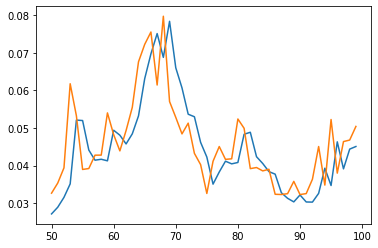

R^2 test:  0.6319303057576557
MSE test:  0.00061235775


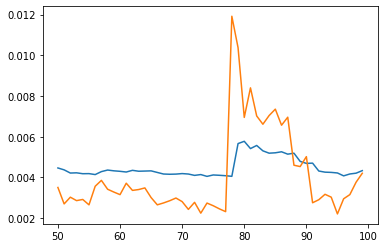

In [61]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
print('R^2 train: ', r2_score(train_results['Train Predictions'], train_results['Actuals']))
print('MSE train: ', mean_squared_error(train_results['Train Predictions'], train_results['Actuals']))
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])
plt.show()


train_predictions = model.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
print('R^2 test: ', r2_score(train_results['Train Predictions'], train_results['Actuals']))
print('MSE test: ', mean_squared_error(train_results['Train Predictions'], train_results['Actuals']))
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

## Random Forest 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [63]:
tmp_rf = tmp.copy()
tmp_rf = normalize(tmp_reg)

x = tmp_rf.drop(['prices_avg'], axis = 1).copy()
y = tmp_rf['prices_avg'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state=32)

In [64]:
model = RandomForestRegressor(n_estimators=10, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

grid_rf = {
'n_estimators': [10, 20, 50, 100, 500],  
'max_depth': np.arange(1, 20, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 32, 44]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=500, random_state=44; total time=  19.5s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=500, random_state=44; total time=  19.0s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=500, random_state=44; total time=  18.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100, random_state=1; total time=   3.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100, random_state=1; total time=   3.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=100, random_state=1; total time=   3.5s
[CV] END bootstrap=False, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=100, random_state=2; total time=   3.8s

In [69]:
# best_parameters['']

In [67]:
model = RandomForestRegressor(n_estimators=best_parameters['random_state'], 
                              random_state=best_parameters['n_estimators'], 
                              min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], 
                              max_depth=best_parameters['max_depth'], 
                              bootstrap=best_parameters['bootstrap'])
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[0.00996604 0.09894815 0.03781877 ... 0.01377693 0.00865253 0.00223192]
(2281,)


In [68]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, predict), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, predict), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("R^2   ", round(metrics.r2_score(y_test, predict), 4))
print('Train Score :', round(model.score(x_train, y_train) * 100, 4))
print('Test Score  :', round(model.score(x_test, y_test) * 100, 4))
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2)) 

MAE:   0.0044
MSE:   0.0002
RMSE:  0.0127
R^2    0.9576
Train Score : 98.9607
Test Score  : 95.7591
Accuracy:  52.8
